In [1]:
import pandas as pd
import os

In [2]:
def compute_results(df):
    correctness = 0
    sc_correctness = 0
    mad_correctness = 0
    rerailer_correctness = 0
    for row_index in range(len(df)):
        row = df.iloc[row_index]
        correct_ans = row['Correct_Answer'].lower()
        output_answer = row['Cot_random_answer'].lower()
        sc_answer = row['Smv_Answer'].lower()
        # judge_answer = row['Output_Answer'].lower()
        mad_answer = row['MAD_Answer'].lower()
        rerailer_ans = row['Corrected COT Answer'].lower()
        if correct_ans == output_answer[0]:
            correctness += 1
        else:
            correctness += 0
        if correct_ans == sc_answer[0]:
            sc_correctness += 1
        else:
            sc_correctness += 0
        if correct_ans == mad_answer[0]:
            mad_correctness += 1
        else:
            mad_correctness += 0
        if correct_ans == rerailer_ans[0]:
            rerailer_correctness += 1
        else:
            rerailer_correctness += 0
    
    result_dict={
        'CoT':round(correctness/len(df),3),
        'SC':round(sc_correctness/len(df),3),
        'MAD':round(mad_correctness/len(df),3),
        'Rerailer':round(rerailer_correctness/len(df),3)
    }
    return result_dict

In [3]:
df_3 = pd.read_csv('../result/gpt3.5_results.csv')
df_4 = pd.read_csv('../result/gpt4_results.csv')
df_claude = pd.read_csv('../result/claude_results.csv')

In [4]:
df_3.Category.value_counts()

Category
Math                        295
Challenging Math            288
disambiguation_qa           200
elementary_mathematics       99
jurisprudence                99
date_understanding           99
professional_law             99
college_biology              98
international_law            98
high_school_statistics       97
philosophy                   96
business_ethics              96
college_physics              96
college_computer_science     96
electrical_engineering       96
abstract_algebra             95
college_medicine             94
professional_accounting      91
college_chemistry            83
college_mathematics          81
formal_logic                 78
Name: count, dtype: int64

In [5]:
category_mapping = {
    'Math': ['Math', 'elementary_mathematics', 'high_school_statistics', 'abstract_algebra', 'formal_logic'],
    'Advanced Math and Science': ['Challenging Math', 'college_biology', 'college_physics', 'college_medicine', 'college_chemistry', 'college_mathematics','college_computer_science', 'electrical_engineering','professional_accounting'],
    'Commonsense Reasoning': ['disambiguation_qa', 'jurisprudence', 'date_understanding', 'professional_law', 'international_law', 'philosophy', 'business_ethics']
}
reverse_mapping = {}
for new_cat, old_cats in category_mapping.items():
    for old_cat in old_cats:
        reverse_mapping[old_cat] = new_cat

# Map the old categories to new categories
df_3['Big_Category'] = df_3['Category'].map(reverse_mapping)
df_claude['Big_Category'] = df_claude['Category'].map(reverse_mapping)
df_4['Big_Category'] = df_4['Category'].map(reverse_mapping)

In [6]:
results_li = []
result = compute_results(df_3)
result['Model'] = 'gpt-3.5-turbo'
result['Category'] = 'all'
results_li.append(pd.DataFrame(result, index=[0]))
for cate in set(df_3.Big_Category.tolist()):
    df_temp = df_3[df_3['Big_Category']==cate]
    result = compute_results(df_temp)
    result['Model'] = 'gpt-3.5-turbo'
    result['Category'] = cate
    results_li.append(pd.DataFrame(result, index=[0]))
df_result_3 = pd.concat(results_li,ignore_index=True)[['Category','Model','CoT','SC','Rerailer']]
df_result_3

,Category,Model,CoT,SC,Rerailer
0,all,gpt-3.5-turbo,0.675,0.692,0.730
1,Commonsense Reasoning,gpt-3.5-turbo,0.727,0.738,0.740
2,Math,gpt-3.5-turbo,0.625,0.640,0.694
3,Advanced Math and Science,gpt-3.5-turbo,0.669,0.690,0.745


In [7]:
results_li = []
result = compute_results(df_claude)
result['Model'] = 'claude-3-sonnet'
result['Category'] = 'all'
results_li.append(pd.DataFrame(result, index=[0]))
for cate in set(df_claude.Big_Category.tolist()):
    df_temp = df_claude[df_claude['Big_Category']==cate]
    result = compute_results(df_temp)
    result['Model'] = 'claude-3-sonnet'
    result['Category'] = cate
    results_li.append(pd.DataFrame(result, index=[0]))
df_result_claude = pd.concat(results_li,ignore_index=True)[['Category','Model','CoT','SC','MAD','Rerailer']]
df_result_claude

,Category,Model,CoT,SC,MAD,Rerailer
0,all,claude-3-sonnet,0.686,0.705,0.688,0.722
1,Math,claude-3-sonnet,0.652,0.667,0.654,0.669
2,Commonsense Reasoning,claude-3-sonnet,0.718,0.736,0.717,0.757
3,Advanced Math and Science,claude-3-sonnet,0.683,0.706,0.688,0.729


In [8]:
results_li = []
result = compute_results(df_4)
result['Model'] = 'gpt-4'
result['Category'] = 'all'
results_li.append(pd.DataFrame(result, index=[0]))
for cate in set(df_4.Big_Category.tolist()):
    df_temp = df_4[df_4['Big_Category']==cate]
    result = compute_results(df_temp)
    result['Model'] = 'gpt-4'
    result['Category'] = cate
    results_li.append(pd.DataFrame(result, index=[0]))
df_result_4 = pd.concat(results_li,ignore_index=True)[['Category','Model','CoT','SC','Rerailer']]
df_result_4

,Category,Model,CoT,SC,Rerailer
0,all,gpt-4,0.694,0.711,0.748
1,Commonsense Reasoning,gpt-4,0.728,0.740,0.760
2,Math,gpt-4,0.675,0.690,0.716
3,Advanced Math and Science,gpt-4,0.680,0.701,0.759


<Figure size 1600x800 with 0 Axes>

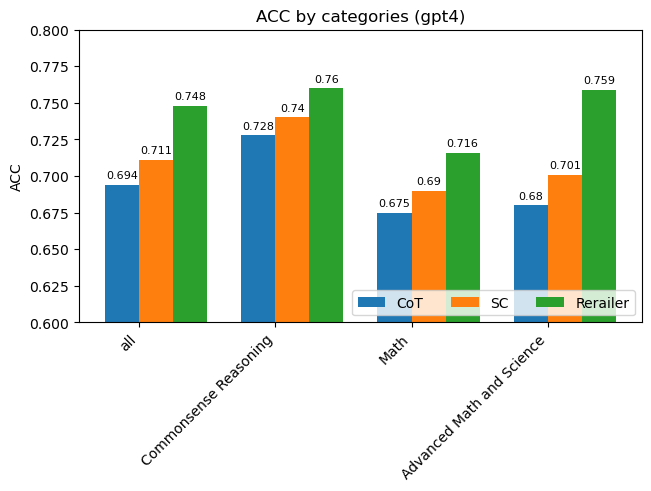

<Figure size 1600x800 with 0 Axes>

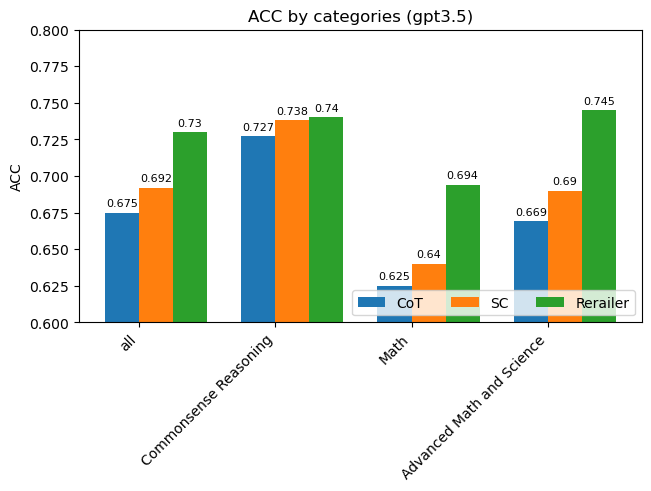

<Figure size 1600x800 with 0 Axes>

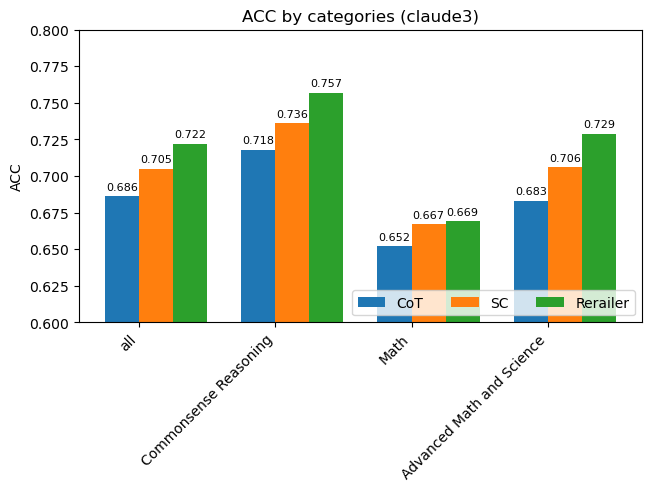

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def get_plot(df, model,chunk_size=4):
    categories = tuple(df.Category.tolist())
    result = {'CoT': tuple(df.CoT.tolist()),
              'SC': tuple(df.SC.tolist()),
              'Rerailer': tuple(df.Rerailer.tolist()),
              # Add more columns here if needed
              }

    num_categories = len(categories)
    num_chunks = (num_categories + chunk_size - 1) // chunk_size  # Calculate number of chunks
    width = 0.25  # the width of the bars

    for chunk in range(num_chunks):
        start_idx = chunk * chunk_size
        end_idx = min(start_idx + chunk_size, num_categories)

        chunk_categories = categories[start_idx:end_idx]
        chunk_result = {k: v[start_idx:end_idx] for k, v in result.items()}
        x = np.arange(len(chunk_categories))  # the label locations

        plt.figure(figsize=(16, 8))
        fig, ax = plt.subplots(layout='constrained')

        multiplier = 0
        for attribute, measurement in chunk_result.items():
            offset = width * multiplier
            rects = ax.bar(x + offset, measurement, width, label=attribute)
            ax.bar_label(rects, padding=3,fontsize =8)
            multiplier += 1

        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_ylabel('ACC')
        ax.set_title(f'ACC by categories ({model})')
        ax.set_xticks(x + width / 2)
        ax.set_xticklabels(chunk_categories, rotation=45, ha='right')  # Rotate x-axis labels
        ax.legend(loc='lower right', ncols=3)
        ax.set_ylim(0.6, 0.8)

        plt.show()

get_plot(df_result_4,'gpt4')
get_plot(df_result_3,'gpt3.5')
get_plot(df_result_claude,'claude3')


# cost analysis

In [27]:
from openai import OpenAI
client = OpenAI(api_key=api_key)

completion = client.chat.completions.create(
  model="gpt-4",
  messages=[
    {"role": "system", "content": "You are an expert in college math assistant, skilled in explaining complex programming concepts with creative flair. Help me answer question step by step. clearly state your reasoning path and final answer"},
    {"role": "user", "content": "Let y = f(x) be a solution of the differential equation x dy + (y - xe^x) dx = 0 such that y = 0 when x = 1. What is the value of f(2)? The options are: A) 1/(2e), B) 1/e, C) e^2/2, D) 2e"}
  ]
)

print(completion.choices[0].message)


ChatCompletionMessage(content="Sure, let's solve this step by step.\n\nStep 1:\nFirst, rearrange the differential equation:\n\nx dy + (y - xe^x) dx = 0\ncan be rewritten as:\n\ndy/dx + y/x - e^x = 0\n\n\nStep 2:\nThis is a first order linear non-homogeneous differential equation. \n\nThe standard form of such an equation is:\n\ndy/dx + P(x)y = Q(x)\n\nWhere P(x) = 1/x and Q(x) = -e^x in our case.\n\n\nStep 3:\nTo solve such equations, we find the integrating factor which is e^(∫P(x) dx), \n\nwhich in this case is e^(∫1/x dx) = e^(ln|x|) = |x|.\n\n\nStep 4:\nMultiply every term in the equation by the integrating factor:\n\n|x| dy/dx + y - x|e^x|dx = 0\nsimplify to:\nx dy/dx + y - x^2*e^x = 0\n\n\nStep 5:\nAfter multiplication by the integrating factor, the left-hand side of the equation will be the derivative of (Integrating factor)*y with respect to x. \n\nTherefore: \nd/dx (x*y) = x^2 * e^x\n\nWe can solve this by integrating both sides:\n\n∫d/dx (x*y) dx = ∫x^2 * e^x dx\n\nRequires i

In [33]:
unit_time = 22*1000
unit_cost = 0.06*1000
SC_call = 40

cot_call = 3
judge_call = 1
root_checker_call = 10
debate_call = 1
check_times = 2
final_cot_call = 1
Rerailer_call = cot_call+judge_call+(root_checker_call+debate_call)*check_times + final_cot_call
print(1*unit_cost,1*unit_time/3600)
print(SC_call*unit_cost,SC_call*unit_time/3600)
print(Rerailer_call*unit_cost,Rerailer_call*unit_time/3600)


60.0 6.111111111111111
2400.0 244.44444444444446
1620.0 165.0
